Group 43 

---

S B KOUSHIK  S20170010131 \
CHINTALA SAI PRANAY RAJU  S20170010036 \
B ABHISHEK   S20170010028 \
SRAVANI KUNAPAREDDY S20170020216 \




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 

Mounted at /content/drive


##Import Statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import KFold
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Data Extraction


In [ ]:
df=pd.read_csv('/content/drive/My Drive/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


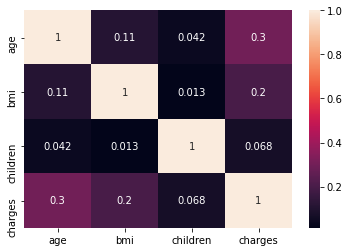

In [ ]:
df.describe()
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True) 

In [ ]:
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["obese"]=map_obese(df["bmi"])

def map_weight(column):
  mapped = []
  for row in column:
    if row < 18.5 : 
      mapped.append('underweight')
    elif (row >= 18.5 and row <= 24.9 ):
      mapped.append('normalweight')
    elif ( row >= 25 and row <= 30):  
      mapped.append('overweight')
    else:
      mapped.append('obese')
  return mapped  
df["weight"]  = map_weight(df["bmi"])       

##EDA

In [ ]:
print(df.describe())

               age          bmi     children       charges        obese
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.663397     1.094918  13270.422265     0.526906
std      14.049960     6.098187     1.205493  12110.011237     0.499462
min      18.000000    15.960000     0.000000   1121.873900     0.000000
25%      27.000000    26.296250     0.000000   4740.287150     0.000000
50%      39.000000    30.400000     1.000000   9382.033000     1.000000
75%      51.000000    34.693750     2.000000  16639.912515     1.000000
max      64.000000    53.130000     5.000000  63770.428010     1.000000


In [ ]:
print(df.head())

   age     sex     bmi  children  ...     region      charges  obese        weight
0   19  female  27.900         0  ...  southwest  16884.92400      0    overweight
1   18    male  33.770         1  ...  southeast   1725.55230      1         obese
2   28    male  33.000         3  ...  southeast   4449.46200      1         obese
3   33    male  22.705         0  ...  northwest  21984.47061      0  normalweight
4   32    male  28.880         0  ...  northwest   3866.85520      0    overweight

[5 rows x 9 columns]


In [ ]:
print(df.shape)

(1338, 9)


In [ ]:
df.isnull().values.any()
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
obese       0
weight      0
dtype: int64

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
obese          2
weight         4
dtype: int64

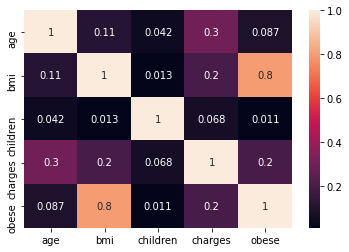

In [ ]:
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True) 

##Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
cat1=df['sex']
cat1_encoded=le.fit_transform(cat1)
print(cat1_encoded)
cat2=df['smoker']
cat2_encoded=le.fit_transform(cat2)
print(cat2_encoded)
cat3=df['region']
cat3_encoded=le.fit_transform(cat3)
print(cat3_encoded)
cat4=df['weight']
cat4_encoded=le.fit_transform(cat4)
print(cat4_encoded)

[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]
[2 1 1 ... 1 2 2]


In [ ]:

X=df.loc[:,['age','sex','bmi','children','smoker','region','charges','weight']]
# print(X)
X['sex']=cat1_encoded
X['smoker']=cat2_encoded
X['region']=cat3_encoded
X['weight']=cat4_encoded
# X['charges']=df['charges']
# X=X.sample(frac=1)
# X.corr()
# sns.heatmap(X.corr())


In [ ]:
X.corr()

,age,sex,bmi,children,smoker,region,charges,weight
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.011483
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,-0.010822
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.015190
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.019942
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,-0.018972
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.009422
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,-0.036761
weight,0.011483,-0.010822,0.015190,-0.019942,-0.018972,0.009422,-0.036761,1.000000


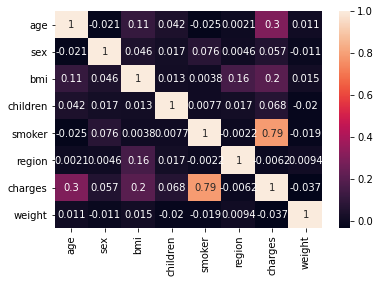

In [ ]:
corr_mat=X.corr()
sns.heatmap(corr_mat,annot=True) 

##EDA

<Figure size 2880x1440 with 0 Axes>

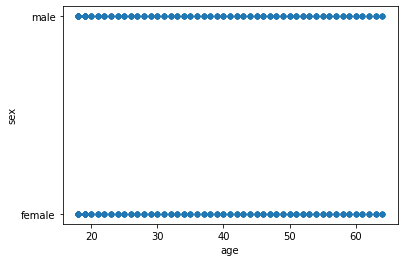

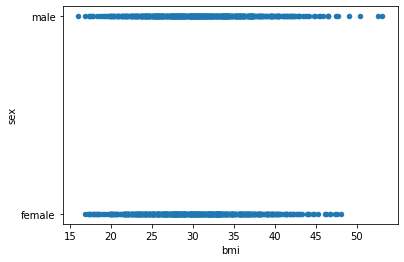

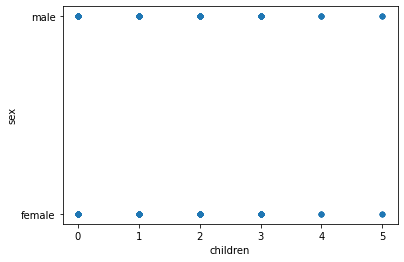

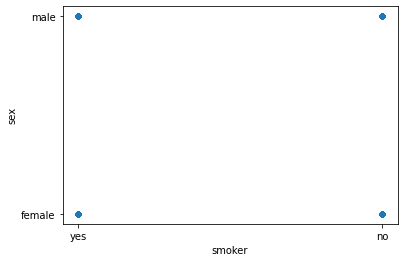

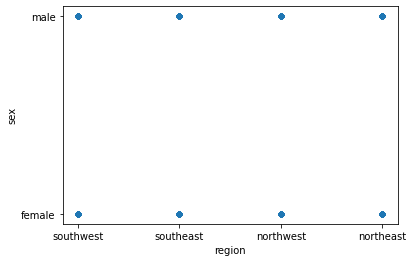

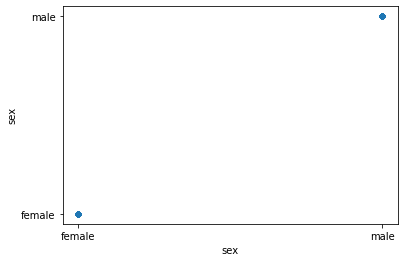

In [ ]:
import matplotlib.pyplot as plt
label= ['age','bmi','children','smoker','region','sex']
fig, axes = plt.subplots(figsize=(40,20),nrows=0,ncols=1)
# print(axes.shape)
for i in range(len(label)):
#  for j in range(len(label)):
  df.plot.scatter(x=label[i],y='sex')

    

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


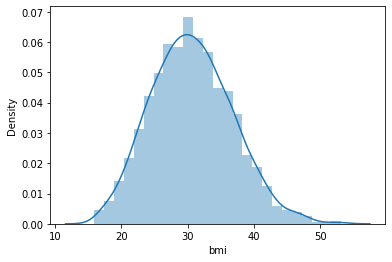

In [ ]:
ax1=sns.distplot(X['bmi'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


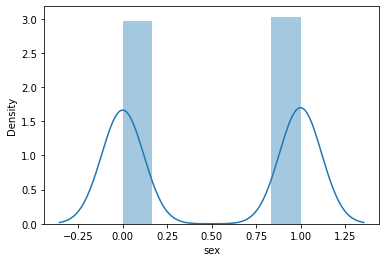

In [ ]:
ax1=sns.distplot(X['sex'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


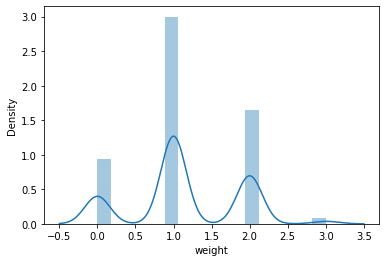

In [ ]:
ax1=sns.distplot(X['weight'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


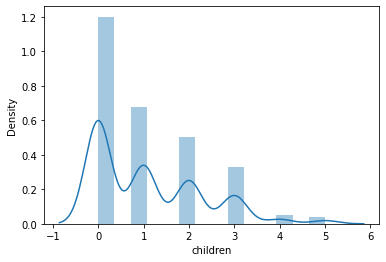

In [ ]:
ax1=sns.distplot(X['children'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


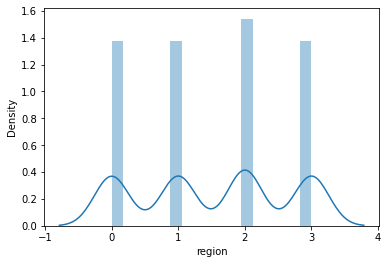

In [ ]:
ax1=sns.distplot(X['region'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


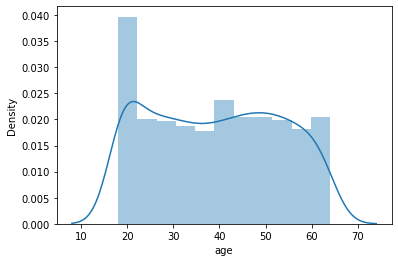

In [ ]:
ax1=sns.distplot(X['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


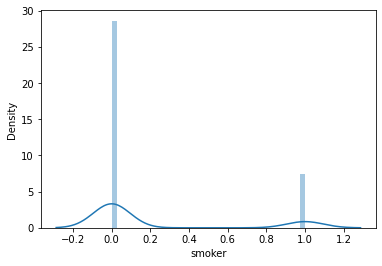

In [ ]:
ax1=sns.distplot(X['smoker'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


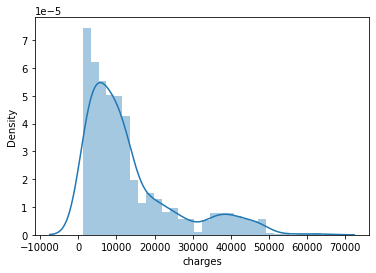

In [ ]:
ax1=sns.distplot(X['charges'])

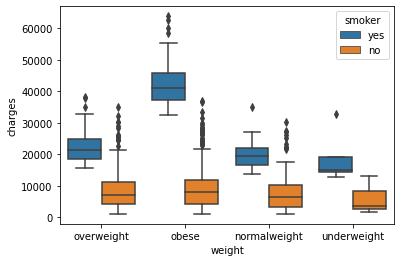

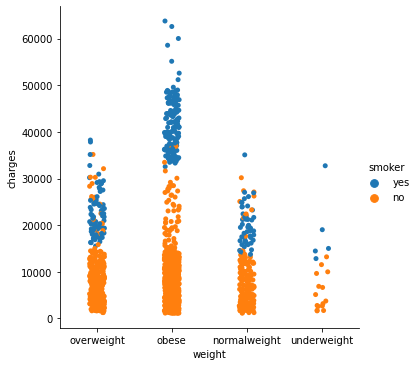

In [ ]:
sns.boxplot(data=df, y='charges', x='weight',hue='smoker')
sns.catplot(data=df, y='charges', x='weight',hue='smoker')

In [ ]:
Y=df['charges']
print(X)
print(X.shape)

      age  sex     bmi  children  smoker  region      charges  weight
0      19    0  27.900         0       1       3  16884.92400       2
1      18    1  33.770         1       0       2   1725.55230       1
2      28    1  33.000         3       0       2   4449.46200       1
3      33    1  22.705         0       0       1  21984.47061       0
4      32    1  28.880         0       0       1   3866.85520       2
...   ...  ...     ...       ...     ...     ...          ...     ...
1333   50    1  30.970         3       0       1  10600.54830       1
1334   18    0  31.920         0       0       0   2205.98080       1
1335   18    0  36.850         0       0       2   1629.83350       1
1336   21    0  25.800         0       0       3   2007.94500       2
1337   61    0  29.070         0       1       1  29141.36030       2

[1338 rows x 8 columns]
(1338, 8)


In [ ]:
print(Y)
print(Y.shape)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
(1338,)


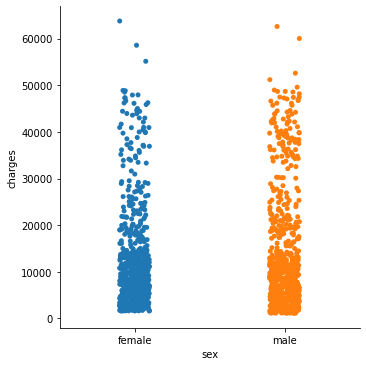

In [ ]:
ax = sns.catplot(x="sex", y="charges", data=df)


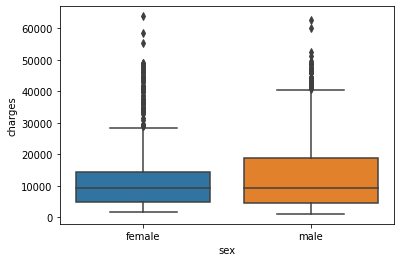

In [ ]:
ax = sns.boxplot(x="sex", y="charges", data=df)


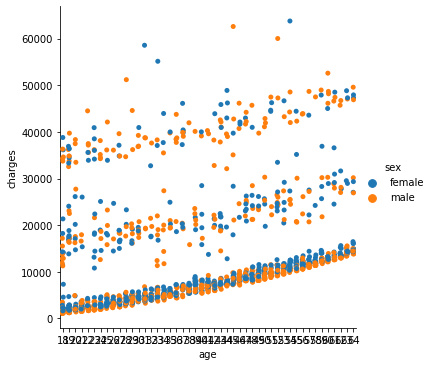

In [ ]:
ax = sns.catplot(x="age", y="charges", hue="sex", data=df)


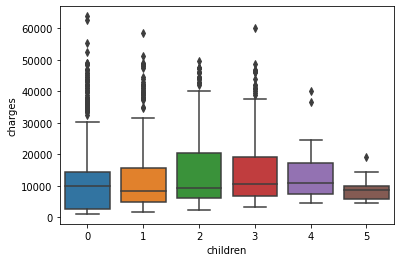

In [ ]:
ax = sns.boxplot(x="children", y="charges", data=df)


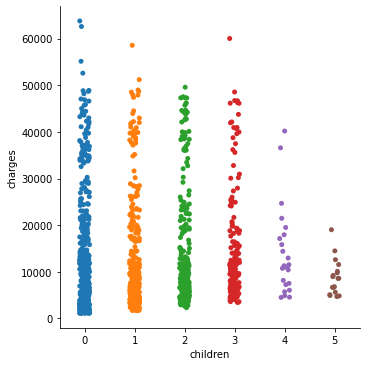

In [ ]:
ax = sns.catplot(x="children", y="charges", data=df)


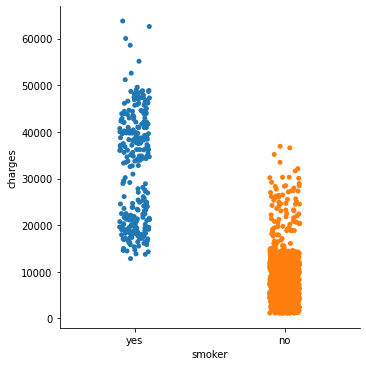

In [ ]:
ax = sns.catplot(x="smoker", y="charges", data=df)


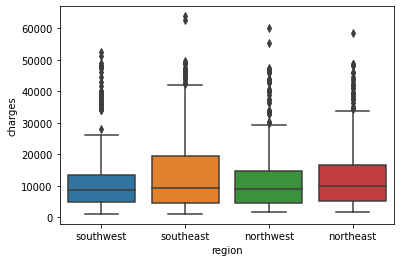

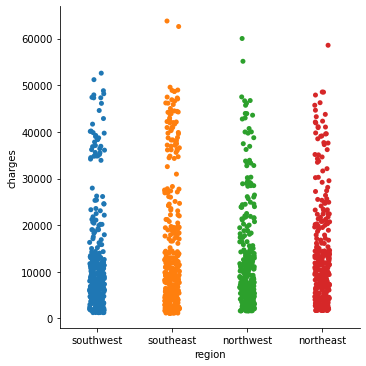

In [ ]:
ax = sns.boxplot(x="region", y="charges", data=df)
ax1 = sns.catplot(x="region", y="charges", data=df)

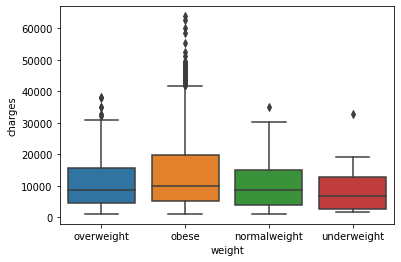

In [ ]:
# # print(X["weight"])
# dict1={0:"low",1:"under-weight",2:"overweight",3:"high"}
ax1 = sns.boxplot(x="weight", y="charges", data=df)
# ax1=sns.catplot(x="weight",y="charges")

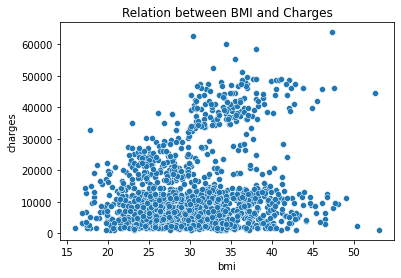

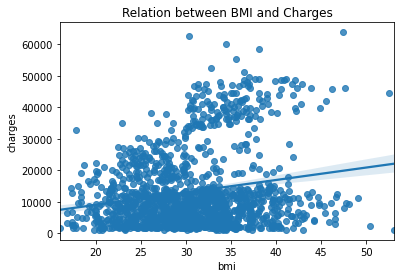

In [ ]:
plt.title('Relation between BMI and Charges')
sns.scatterplot(x=df['bmi'],y=df['charges'])
plt.show()
plt.title('Relation between BMI and Charges')
sns.regplot(x=df['bmi'],y=df['charges'])
plt.show()


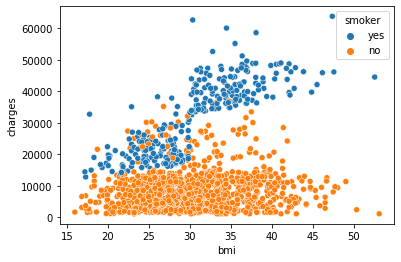

In [ ]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

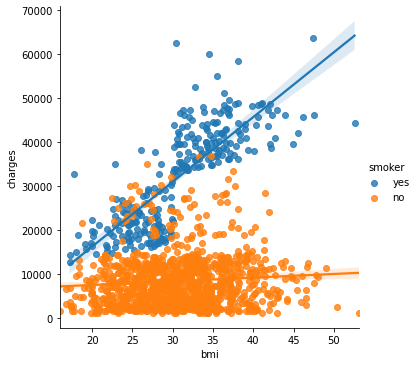

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

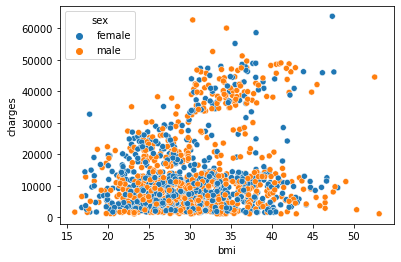

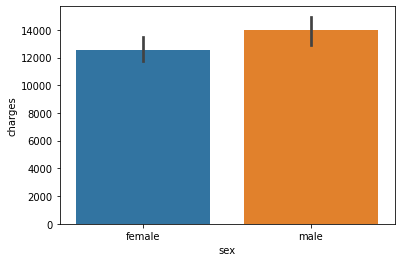

In [ ]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['sex'])
plt.show()
sns.barplot(x=df['sex'], y=df['charges'])
plt.show()

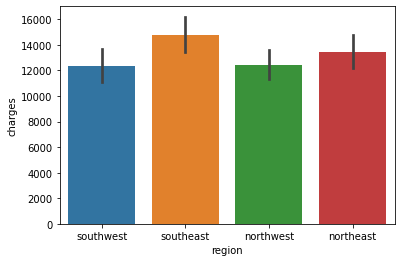

In [ ]:

sns.barplot(x=df['region'], y=df['charges'])
plt.show()

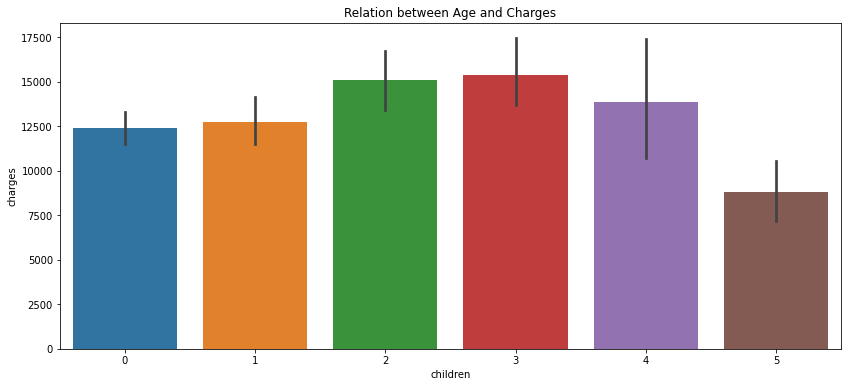

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Relation between Age and Charges')
sns.barplot(x=df['children'], y=df['charges'])

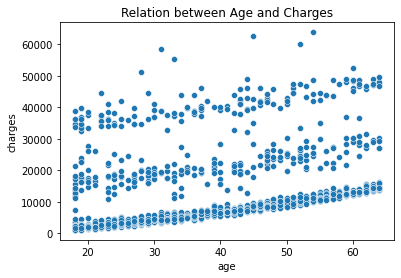

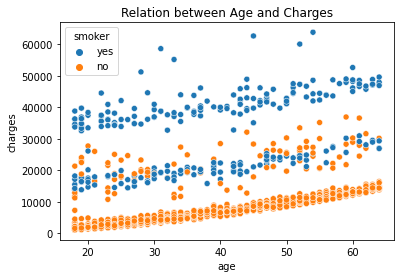

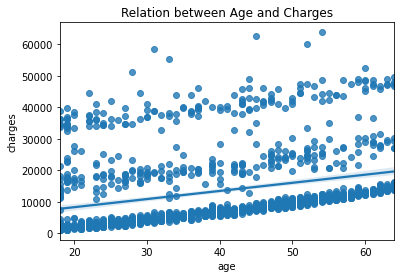

In [ ]:
plt.title('Relation between Age and Charges')
sns.scatterplot(x=df['age'],y=df['charges'])
plt.show()
plt.title('Relation between Age and Charges')
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'])
plt.show()

plt.title('Relation between Age and Charges')
sns.regplot(x=df['age'],y=df['charges'])
plt.show()

##Normality Test

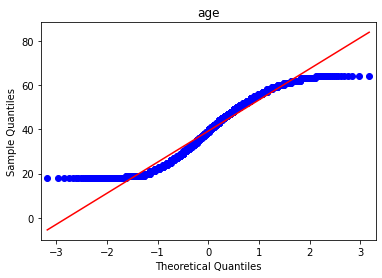

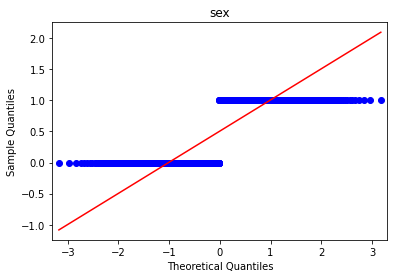

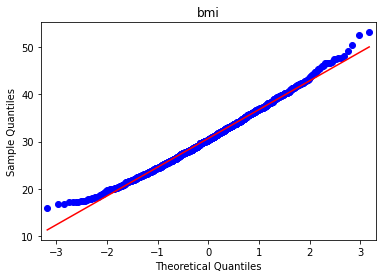

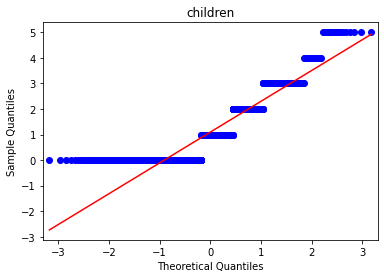

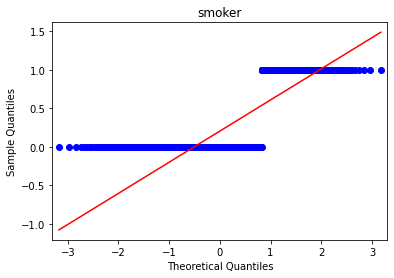

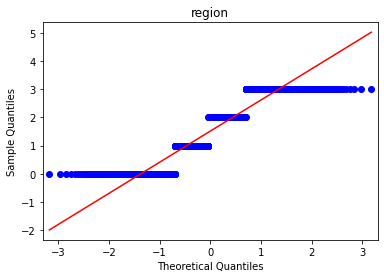

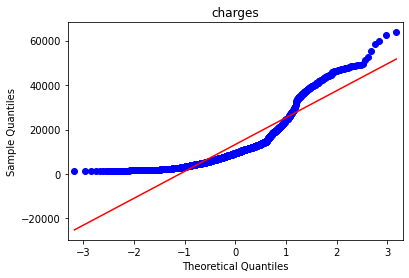

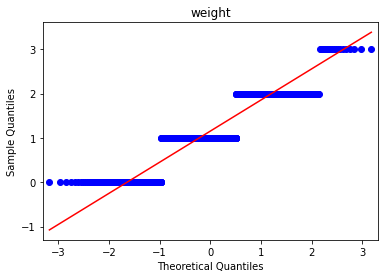

In [ ]:
for each in X.keys():
    qqplot(X[each],line='s')
    plt.title(each)
    plt.show()
    

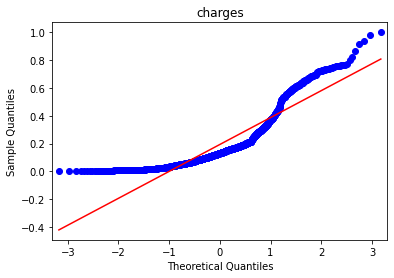

In [ ]:

qqplot(normalised_y,line='s')
plt.title("charges")
plt.show()

In [ ]:
z = np.abs(stats.zscore(X))
X_z = X[(z < 3).all(axis=1)]

In [ ]:
outlier = []
for i in range(len(z)) :
    for j in range(len(z[0])) :
         if z[i][j] > 3 :
                outlier.append(i)
print(outlier)
print(len(outlier))

[32, 34, 71, 116, 166, 413, 425, 438, 543, 568, 577, 640, 819, 847, 877, 932, 937, 969, 984, 1047, 1085, 1116, 1130, 1146, 1230, 1245, 1272, 1300, 1317]
29


In [ ]:
print(X.shape)
X=X.drop(outlier,axis=0)
# import statsmodels.api as sm
# ols_model = sm.OLS(y_train,x_train).fit()
print(X.shape)

(1338, 8)


AttributeError: ignored

##With Normalization

In [ ]:
print(X.shape)
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
# print(X)

# X=X.loc[:,['age','sex','bmi','children','smoker','region']]
print(X.shape)
print(X[0])

(1338, 8)
(1338, 8)
[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459
  0.2985838   1.20617888]


In [ ]:
# Y=X[:,6]
normalised_x=X[:,0:6]
# # 
print(normalised_x.shape)
# print(Y[0])
normalised_y=X[:,6]
# print(normalised_y)
print(normalised_y.shape)

(1338, 6)
(1338,)


In [ ]:
kf=KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


ImportError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalised_x, normalised_y.T, test_size=0.30)

In [ ]:
x1=LinearRegression()
model1=x1.fit(X_train,y_train)
print(model1.score(X_train,y_train)*100)
y_pred1 = x1.predict(X_train)
error=y_train-y_pred1
# print(error.shape)

print(mean_squared_error(y_train,y_pred1,squared=False))
# print(y_pred1[0])
# from statsmodels.stats.diagnostic import het_breuschpagan
# het_breuschpagan(error,y_pred1)
error=error.reshape(916,1)
y_pred1= y_pred1.reshape(916,1)

75.70886281492218
0.4944550914929973


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


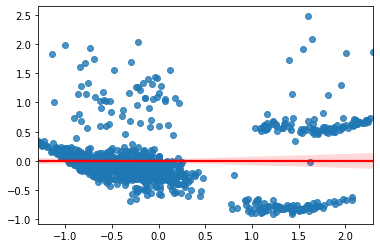

In [ ]:
sns.regplot(y_pred1,error,line_kws={'color': 'red'})

In [ ]:
durbin_watson(error)

2.0249516499068583

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalised_x, normalised_y.T, test_size=0.30)

In [ ]:
regr1 = RandomForestRegressor(max_depth=2, random_state=0)
regr1.fit(X_train, y_train)
y_pred1=regr1.predict(X_test)
# print(y_pred1)
print(regr1.score(X_train, y_train)*100)
print(mean_squared_error(y_test,y_pred1,squared=False))

83.14618650292353
0.4320859331139378


In [ ]:
regr1 = GradientBoostingRegressor()
regr1.fit(X_train, y_train)
y_pred1=regr1.predict(X_test)
# print(y_pred1[0])
print(regr1.score(X_train, y_train)*100)
print(mean_squared_error(y_test,y_pred1,squared=False))

91.60461132886554
0.3980776374911476


In [ ]:
mlp1 = MLPRegressor(hidden_layer_sizes=(110,110,110,110,110,110),random_state=1,alpha=0.0001, max_iter=500,activation='relu',solver='adam',early_stopping=True,learning_rate='adaptive')
mlp1.fit(X_train,y_train)
y_pred1=mlp1.predict(X_test)
print(mlp1.score(X_train,y_train)*100)
print(mean_squared_error(y_test,y_pred1,squared=False))
# print(y_pred1)

88.29761266747104
0.41692538714489363


In [ ]:
reg1=SVR(C=1.0, epsilon=0.1)
reg1.fit(X_train, y_train)
y_pred1=reg1.predict(X_test)
print(reg1.score(X_train,y_train)*100)
print(mean_squared_error(y_test,y_pred1))
# print(y_pred1)

86.32907370726231
0.1743805267043099


##Feature Selection

In [ ]:
X1=df.loc[:,['age','bmi','smoker','charges']]
print(X1)

      age     bmi smoker      charges
0      19  27.900    yes  16884.92400
1      18  33.770     no   1725.55230
2      28  33.000     no   4449.46200
3      33  22.705     no  21984.47061
4      32  28.880     no   3866.85520
...   ...     ...    ...          ...
1333   50  30.970     no  10600.54830
1334   18  31.920     no   2205.98080
1335   18  36.850     no   1629.83350
1336   21  25.800     no   2007.94500
1337   61  29.070    yes  29141.36030

[1338 rows x 4 columns]


In [ ]:
X1['smoker']=cat2_encoded

In [ ]:
X1=X1.drop(outlier,axis=0)

In [ ]:
scaler=StandardScaler()
scaler.fit(X1)
X1=scaler.transform(X1)
# print(X)

# X=X.loc[:,['age','sex','bmi','children','smoker','region']]
print(X1.shape)

(1309, 4)


In [ ]:
normalised_x1=X1[:,0:3]
# # 
print(normalised_x1.shape)
# print(Y[0])
normalised_y1=X1[:,3]
# print(normalised_y)
print(normalised_y1.shape)


(1309, 3)
(1309,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalised_x1, normalised_y1.T, test_size=0.30)

In [ ]:
import statsmodels.api as sm
ols_model = sm.OLS(y_train,X_train).fit()
ols_model.summary()
# y_pred1 = ols_model.predict(X_train)
# # print(ols_model.score(X_train,y_train)*100)
# print(mean_squared_error(y_train,y_pred1,squared=False))
# # print(y_pred1[0])
# error=y_train-y_pred1
# error=error.reshape(916,1)
# y_pred1= y_pred1.reshape(916,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              910.0
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                   9.42e-274
Time:                        04:38:31   Log-Likelihood:                         -658.06
No. Observations:                 916   AIC:                                      1322.
Df Residuals:                     913   BIC:                                      1337.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3133      0.017     18.770      0.000       0.281       0.346
x2             0.1521      0.016      9.421      0.000       0.120       0.184
x3             0.7862      0.017     47.030      0.000       0.753       0.819
==============================================================================
Omnibus:                      184.644   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.473
Skew:                           1.172   Prob(JB):                     3.92e-78
Kurtosis:                       4.960   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


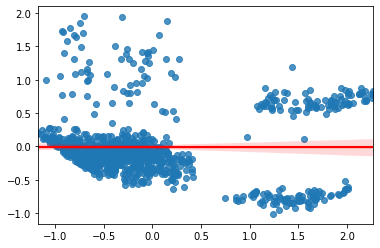

In [ ]:
sns.regplot(y_pred1,error,line_kws={'color': 'red'})

In [ ]:
x1=LinearRegression() 
model1=x1.fit(X_train,y_train)
print(model1.score(X_train,y_train)*100)
y_pred1 = x1.predict(X_train)
print(mean_squared_error(y_train,y_pred1,squared=False))
# print(y_pred1[0])
error=y_train-y_pred1
error=error.reshape(916,1)
y_pred1= y_pred1.reshape(916,1)

74.92768530140744
0.4962287304199923


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


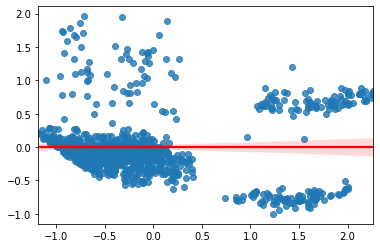

In [ ]:
sns.regplot(y_pred1,error,line_kws={'color': 'red'})

In [ ]:
regr1 = RandomForestRegressor(max_depth=2, random_state=0)
regr1.fit(X_train, y_train)
y_pred1=regr1.predict(X_train)
# print(y_pred1)
print(regr1.score(X_train, y_train)*100)
print(mean_squared_error(y_train,y_pred1,squared=False))
# error=y_train-y_pred1
# error=error.reshape(936,1)
# y_pred1= y_pred1.reshape(936,1)
# print(error.shape)
# print(y_pred1.shape)

83.41882404105677
0.4035453562985599


In [ ]:
# sns.regplot(y_pred1,error,line_kws={'color': 'red'})

In [ ]:
regr1 = GradientBoostingRegressor()
regr1.fit(X_train, y_train)
y_pred1=regr1.predict(X_test)
# print(y_pred1[0])
print(regr1.score(X_train, y_train)*100)
print(mean_squared_error(y_test,y_pred1,squared=False))

90.81986328732619
0.4178482078407666


In [ ]:
mlp1 = MLPRegressor(hidden_layer_sizes=(110,110,110,110,110,110),random_state=1,alpha=0.0001, max_iter=500,activation='relu',solver='adam',early_stopping=True,learning_rate='adaptive')
mlp1.fit(X_train,y_train)
y_pred1=mlp1.predict(X_test)
print(mlp1.score(X_train,y_train)*100)
print(mean_squared_error(y_test,y_pred1,squared=False))

85.94484518016867
0.41991820979284655


In [ ]:
reg1=SVR(kernel='rbf',C=1.0, epsilon=0.1)
reg1.fit(X_train, y_train)
y_pred1=reg1.predict(X_test)
print(reg1.score(X_train,y_train)*100)
print(mean_squared_error(y_test,y_pred1))
# print(y_pred1)

85.22092408921316
0.1757220717383681


In [ ]:
reg1=Ridge(alpha=0.1)
reg1.fit(X_train, y_train)
y_pred1=reg1.predict(X_test)
print(reg1.score(X_train,y_train)*100)
print(mean_squared_error(y_test,y_pred1))

74.92768439812262
0.26245889903413117


In [ ]:
import statsmodels.api as sm
ols_model = sm.OLS(y_train,X_train).fit()
ols_model.summary()
y_pred1 = ols_model.predict(X_train)
# print(ols_model.score(X_train,y_train)*100)
print(mean_squared_error(y_train,y_pred1,squared=False))
# print(y_pred1[0])
error=y_train-y_pred1
error=error.reshape(916,1)
y_pred1= y_pred1.reshape(916,1)